1. посчитать слова на вики

# Новый раздел

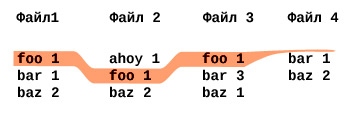

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("https://habrastorage.org/r/w1560/storage/850747fb/f22747fc/2da5cb9c/e8e4d186.jpg", width = 500)

foo bar baz bar

foo - 1  bar - 2 baz - 1

1 шаг. 

foo 1

bar 1

baz 1

bar 1


2 шаг

bar 1

bar 1

baz 1

foo 1

3 шаг

bar 1, 1 

baz 1

foo 1

4 шаг

bar 2

baz 1

foo 1

In [ ]:
words = ["foo", "bar", "baz"]
def map1(word):
  return [word, 1]

arr = ["foo", (1, 1)]
def reduce1(arr):
  return [arr[0], sum(arr(1))]

1

foo bar baz bar

foo 1; baz 1

2

foo bar baz bar

bar 1; bar 1


после

bar 1, 1

baz 1

foo 1


каскад

foo bar baz foo

bar 1

baz 1

foo 2

bar 1 -> -1 bar

baz 1 -> -1 baz

foo 2 -> -2 foo

In [ ]:
def iter_group(queue):
  buf = []
  prev_key = None

  for val in queue:
    curr_key, curr_value = val
    if (curr_key == prev_key or prev_key == None):
      buf.append(curr_value)
    else:
      yield  prev_key, buf
      buf = []
      buf.append(curr_value)
    if buf:
      yield  curr_key, buf


class MapReduce:
  def __init__(self):
    self.queue = []

  def send(self, a, b):
    self.queue.append((a, b))

  def count(self):
    return len(self.queue)

  def __iter__(self):
    return iter_group(sorted(self.queue))

In [ ]:
x = MapReduce()

for word in "foo bar bar".split():
  x.send(word, 1)
print(x.queue)
for word, ones in x:
  print(word, sum(ones))
print(x.queue)

[('foo', 1), ('bar', 1), ('bar', 1)]
bar 1
bar 2
foo 3
[('foo', 1), ('bar', 1), ('bar', 1)]


Hadoop

1. Hadoop Common

2. HDFS

3. YARN

4. MapReduce

In [ ]:
IPython.display.Image("https://cdn.otus.ru/media/public/93/92/Hadoop_Ecosystem_1-1801-939241.jpg", width = 500)

1. горизонтальное масштабирование

2. код отправляется к данным

3. отказоустойчивость

4. инкапсуляция сложности реализации

mrjob

In [ ]:
!pip install mrjob

     |████████████████████████████████| 439 kB 8.7 MB/s 


In [ ]:
from mrjob.job import MRJob

In [ ]:
!python3 CountWord.py text.txt

In [ ]:
!pip install google-colab-shell

  Created wheel for google-colab-shell: filename=google_colab_shell-0.2-py3-none-any.whl size=4124 sha256=d86ab8011e3205566bd6f6234e8ffd5745850ea54b29d2aa070a342472fd4187
  Stored in directory: /root/.cache/pip/wheels/ee/62/db/d033316a546102d1da60b51a0cc4ddcf0b8c3cc6044469a47b
Successfully built google-colab-shell


In [ ]:
from google_colab_shell import getshell
getshell()

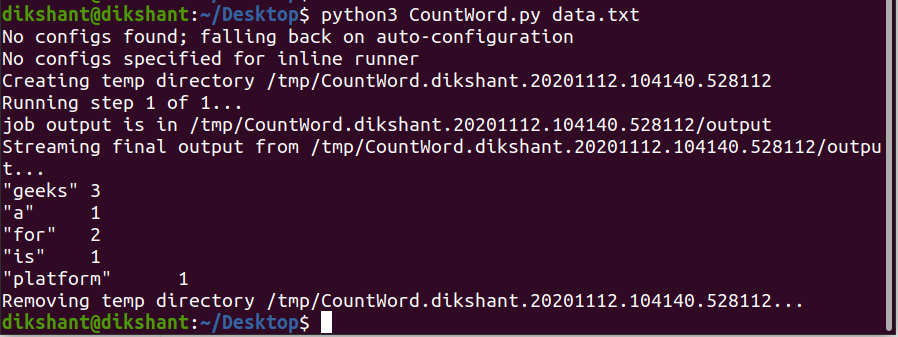

In [ ]:
IPython.display.Image("https://media.geeksforgeeks.org/wp-content/uploads/20201112163602/runningwordcount.png", width = 500)

In [ ]:
!python3 CountWord.py text.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/CountWord.root.20220316.071533.917193
Running step 1 of 1...
job output is in /tmp/CountWord.root.20220316.071533.917193/output
Streaming final output from /tmp/CountWord.root.20220316.071533.917193/output...
"foo"	3
"bar"	1
"baz"	2
Removing temp directory /tmp/CountWord.root.20220316.071533.917193...


In [ ]:
# from mrjob.job import MRJob

# class Count(MRJob):
#   def mapper(self, _, line):
#     for word in line.split():
#       yield (word, 1)

#   def reducer(self, word, counts):
#     yield(word, sum(counts))

# if __name__ == "__main__":
#   Count.run()

In [ ]:
!python3 Average1.py numbers.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/Average1.root.20220316.071616.948415
Running step 1 of 1...
job output is in /tmp/Average1.root.20220316.071616.948415/output
Streaming final output from /tmp/Average1.root.20220316.071616.948415/output...
"avg="	3.2142857142857144
Removing temp directory /tmp/Average1.root.20220316.071616.948415...


In [ ]:
# from mrjob.job import MRJob

# class WordFrequency(MRJob):
#   def mapper(self, _, line):
#     for number in line.split():
#       yield 1, int(number)

#   def reducer(self, key, values):
#     values = list(values)
#     yield "avg=", sum(values) / len(values)

# if __name__ == '__main__':
#   WordFrequency.run()

In [ ]:
!python3 Average2.py numbers.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/Average2.root.20220316.072318.158135
Running step 1 of 1...
job output is in /tmp/Average2.root.20220316.072318.158135/output
Streaming final output from /tmp/Average2.root.20220316.072318.158135/output...
"avg="	3.2142857142857144
Removing temp directory /tmp/Average2.root.20220316.072318.158135...


In [ ]:
# from mrjob.job import MRJob

# class WordFrequency(MRJob):
#   def mapper(self, _, line):
#     for number in line.split():
#       yield 1, int(number)

#   def combiner(self, _, values):
#     values = list(values)
#     yield "num", (sum(values), len(values))

#   def reducer(self, _, values):
#     sums, lens = zip(*values)
#     yield "avg=", sum(sums)/sum(lens)

# if __name__ == '__main__':
#   WordFrequency.run()

In [ ]:
!python3 MostUsed.py text2.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/MostUsed.root.20220316.073324.455267
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/MostUsed.root.20220316.073324.455267/output
Streaming final output from /tmp/MostUsed.root.20220316.073324.455267/output...
7	"cc"
Removing temp directory /tmp/MostUsed.root.20220316.073324.455267...


In [ ]:
# from mrjob.job import MRJob
# from mrjob.step import MRStep
# import itertools

# class MostUsed(MRJob):
#   def steps(self):
#     return [
#       MRStep(mapper = self.mapper, combiner = self.combiner, reducer = self.reducer),
#       MRStep(reducer = self.most_common_reducer)
#     ]

#   def mapper(self, _, line):
#     for word in line.split():
#       yield word, 1

#   def combiner(self, key, values):
#     yield key, sum(values)

#   def reducer(self, key, values):
#     yield 1, (sum(values), key)

#   def most_common_reducer(self, _, values):
#     yield max(values)

# if __name__ == '__main__':
#   MostUsed.run()